# Capstone Data Science
Coffee Sales Forecasting using Random Forest Regression and Grid Search CV Tuning
1. Faikar Moch Tajudin (1217050052)
2. Haiqel Aziizul Hakeem (1217050060)

### Pendefinisian Masalah: <br>
Sebuah toko kopi tentunya memerlukan persiapan dalam merencanakan persediaan, strategi promosi, dan penjadwalan staf yang efektif. Sehingga model ini mampu memprediksi bagaimana proyeksi penjualan sebuah produk sesuai dengan waktunya. Pemahaman yang lebih baik tentang pola penjualan akan membantu mengoptimalkan operasional dan meningkatkan keuntungan.

# Import Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install kagglehub kaggle

In [ ]:
!kaggle datasets download ihelon/coffee-sales

Dataset URL: https://www.kaggle.com/datasets/ihelon/coffee-sales
License(s): CC0-1.0
  0% 0.00/26.2k [00:00<?, ?B/s]
100% 26.2k/26.2k [00:00<00:00, 45.3MB/s]


In [ ]:
!unzip coffee-sales.zip

Archive:  coffee-sales.zip
  inflating: index.csv               


In [ ]:
# Read dataset
df = pd.read_csv('index.csv')

# Data Preprocessing

In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
# Convert 'datetime' to pandas datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Extract useful datetime features
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['datetime'].dt.hour

In [ ]:
# Encoders for 'coffee_name' and 'cash_type'
coffee_name_encoder = LabelEncoder()
cash_type_encoder = LabelEncoder()

# Encode 'coffee_name' and 'cash_type' using their respective encoders
df['coffee_name_encoded'] = coffee_name_encoder.fit_transform(df['coffee_name'])
df['cash_type_encoded'] = cash_type_encoder.fit_transform(df['cash_type'])

In [ ]:
# Get the mapping for 'coffee_name' (original -> encoded)
coffee_name_mapping = dict(zip(coffee_name_encoder.classes_, range(len(coffee_name_encoder.classes_))))
print("Coffee Name Encoding Mapping:\n", coffee_name_mapping)

# Reverse mapping for 'coffee_name' (encoded -> original)
reverse_mapping_coffee = {v: k for k, v in coffee_name_mapping.items()}
print("\nReverse Mapping (Encoded -> Original) for Coffee Name:\n", reverse_mapping_coffee)

Coffee Name Encoding Mapping:
 {'Americano': 0, 'Americano with Milk': 1, 'Cappuccino': 2, 'Cocoa': 3, 'Cortado': 4, 'Espresso': 5, 'Hot Chocolate': 6, 'Latte': 7}

Reverse Mapping (Encoded -> Original) for Coffee Name:
 {0: 'Americano', 1: 'Americano with Milk', 2: 'Cappuccino', 3: 'Cocoa', 4: 'Cortado', 5: 'Espresso', 6: 'Hot Chocolate', 7: 'Latte'}


In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,day_of_week,hour,coffee_name_encoded,cash_type_encoded
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,4,10,7,0
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,4,12,6,0
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,4,12,6,0
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,4,13,0,0
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,4,13,7,0


In [ ]:
df.describe()

,datetime,money,day_of_week,hour,coffee_name_encoded,cash_type_encoded
count,2341,2341.000000,2341.000000,2341.000000,2341.000000,2341.000000
mean,2024-07-26 05:13:19.630455296,31.816736,2.930799,14.311405,3.338317,0.038018
min,2024-03-01 10:15:50.520000,18.120000,0.000000,7.000000,0.000000,0.000000
25%,2024-05-24 18:17:40.329999872,27.920000,1.000000,10.000000,1.000000,0.000000
50%,2024-08-05 09:19:19.176000,32.820000,3.000000,14.000000,2.000000,0.000000
75%,2024-10-01 12:14:23.382000128,35.760000,5.000000,18.000000,6.000000,0.000000
max,2024-11-16 14:25:47.388000,40.000000,6.000000,22.000000,7.000000,1.000000
std,NaN,5.094530,1.996877,4.344069,2.618316,0.191280


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt

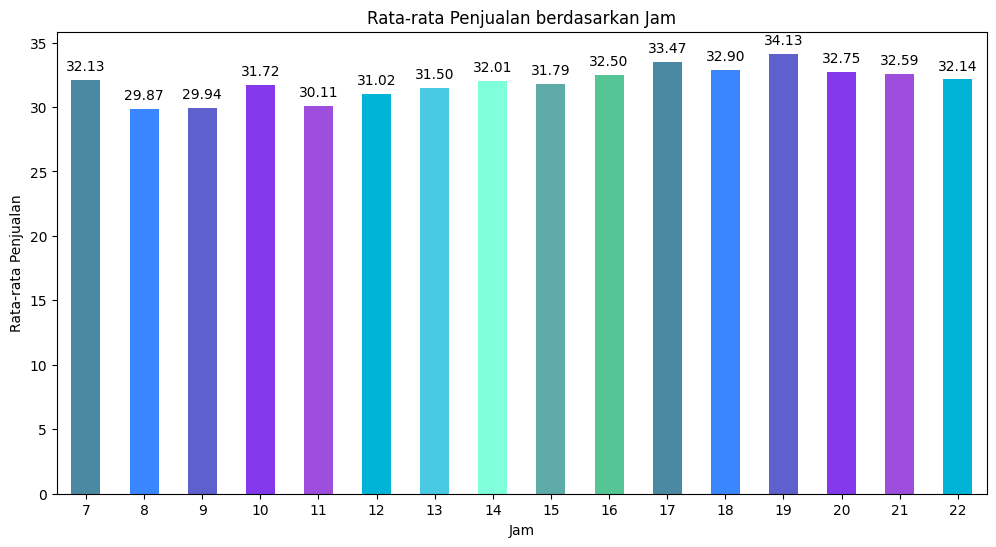

In [ ]:
# Analisis Visualisasi
colors = ['#4B88A2', '#3A86FF', '#5E60CE', '#8338EC', '#9D4EDD',
          '#00B4D8', '#48CAE4', '#80FFDB', '#5EAAA8', '#56C596']

plt.figure(figsize=(12, 6))
grouped_data = df.groupby('hour')['money'].mean()
bars = grouped_data.plot(kind='bar', color=colors)
for i, value in enumerate(grouped_data):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.title('Rata-rata Penjualan berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penjualan')
plt.xticks(rotation=0)
plt.show()

Berdasarkan grafik, dapat terlihat bahwa peak hour dari penjualan kopi adalah pada pukul 7 malam

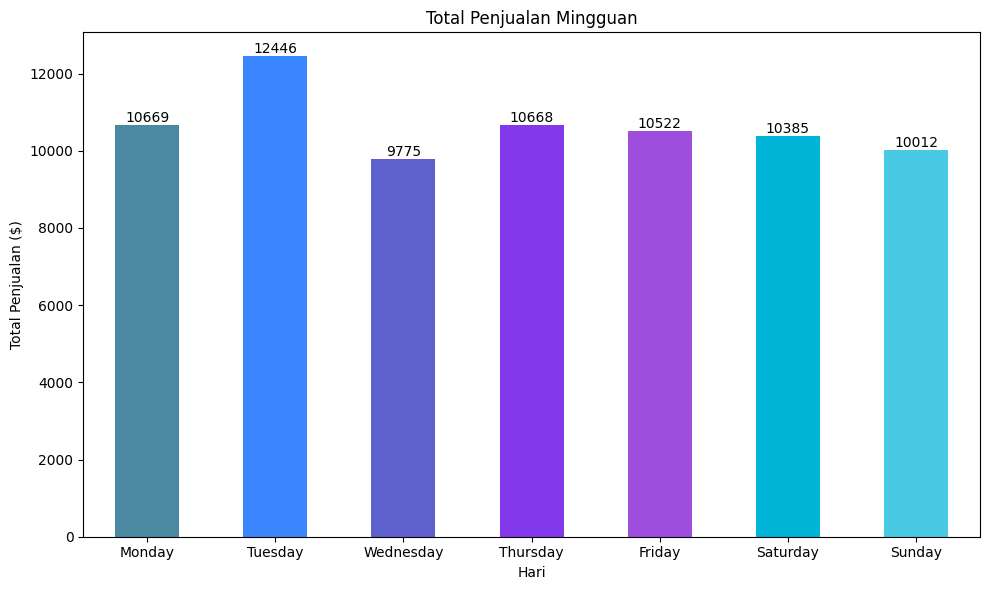

In [ ]:
sales_per_day = df.groupby('day_of_week')['money'].sum()
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10, 6))
bars = sales_per_day.plot(kind='bar', color=colors)
for i, value in enumerate(sales_per_day):
    plt.text(i, value + 1, f'{int(value)}', ha='center', va='bottom', fontsize=10)
plt.title('Total Penjualan Mingguan')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan ($)')
plt.xticks(ticks=range(7), labels=days_of_week, rotation=0)
plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa penjualan tertinggi dalam satu minggu adalah pada hari Selasa

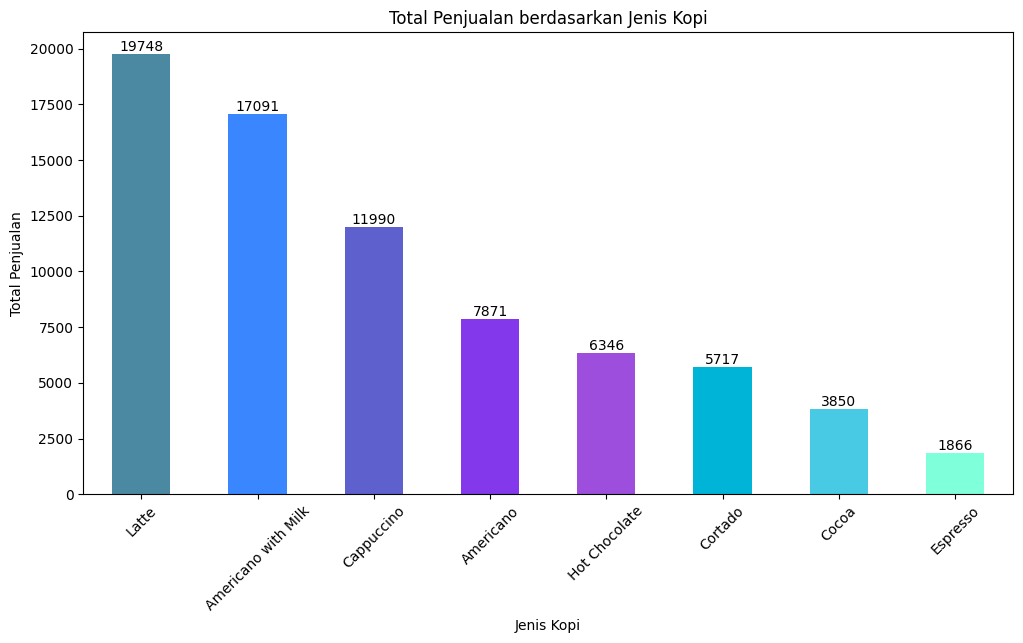

In [ ]:
plt.figure(figsize=(12, 6))
grouped_data = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
bars = grouped_data.plot(kind='bar', color=colors)
for i, value in enumerate(grouped_data):
    plt.text(i, value + 1, f'{int(value)}', ha='center', va='bottom', fontsize=10)
plt.title('Total Penjualan berdasarkan Jenis Kopi')
plt.xlabel('Jenis Kopi')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

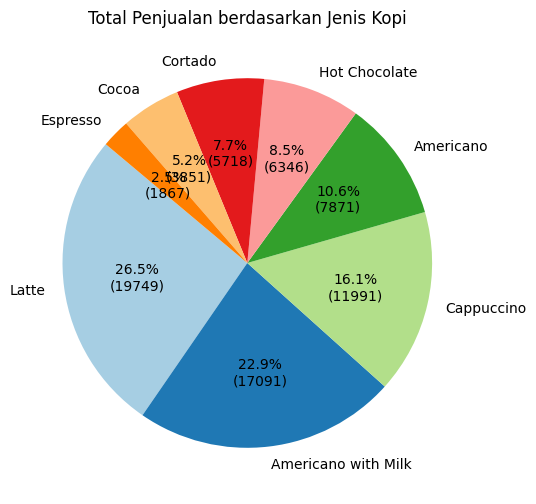

In [ ]:
import matplotlib.pyplot as plt
grouped_data = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
def autopct_with_values(pct, all_vals):
    absolute = int(round(pct/100. * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'
plt.figure(figsize=(8, 6))
plt.pie(
    grouped_data,
    labels=grouped_data.index,
    autopct=lambda pct: autopct_with_values(pct, grouped_data),
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Total Penjualan berdasarkan Jenis Kopi')
plt.show()

Grafik menunjukkan bahwa kopi paling laku adalah Latte (26,5%), Americano dengan susu (22,9%), dan Cappucino (16,1%)

# Model Tuning

In [ ]:
# Prepare the feature matrix (X) and target variables (y)
X = df[['coffee_name_encoded', 'day_of_week', 'hour']]
y = df['money']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the model
rf = RandomForestRegressor(random_state=42)

In [ ]:
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Best model
best_rf = grid_search.best_estimator_

In [ ]:
# Make predictions
y_pred = best_rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Evaluate the model

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.7974
Mean Absolute Error (MAE): 1.9750
Mean Squared Error: 5.224186803453007
Root Mean Squared Error (RMSE): 2.2856


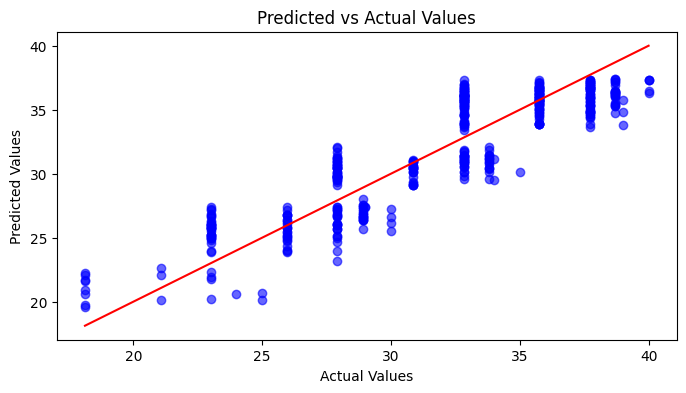

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')

# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Label the plot
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Save and Run the Model

In [ ]:
import pickle
# Save the best model using pickle
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
print("Best model saved successfully!")

Best model saved successfully!


In [ ]:
import pickle  # For loading the model

# Load the saved model using pickle
with open('best_rf_model.pkl', 'rb') as f:
    best_rf_loaded = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
import pickle  # For loading the model

# Load the saved model using pickle
with open('best_rf_model.pkl', 'rb') as f:
    best_rf_loaded = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


# Predict the New Data Input

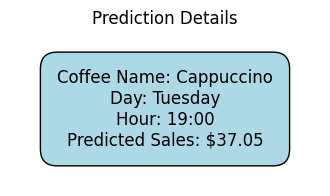

In [ ]:
# Predict the sales for a specific coffee on a specific day and time

input_data = pd.DataFrame({
    # 'Americano': 0, 'Americano with Milk': 1, 'Cappuccino': 2, 'Cocoa': 3,
    # 'Cortado': 4, 'Espresso': 5, 'Hot Chocolate': 6, 'Latte': 7
    'coffee_name_encoded': [2],
    'day_of_week': [1],  # Monday = 0, Tuesday = 1, Wednesday = 2, Thursday = 3, Friday = 4, Saturday = 5, Sunday = 6
    'hour': [19]  # 24 hour format
})

# Mapping for the output
predicted_sales = best_rf_loaded.predict(input_data)
coffee_name = reverse_mapping_coffee[input_data['coffee_name_encoded'][0]]
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_name = days_of_week[input_data['day_of_week'][0]]

plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5,
         f"Coffee Name: {coffee_name}\nDay: {day_name}\nHour: {input_data['hour'][0]}:00\nPredicted Sales: ${predicted_sales[0]:.2f}",
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))

plt.title('Prediction Details')
plt.axis('off')
plt.show()